<a href="https://colab.research.google.com/github/Izu-33/Sales-Analysis/blob/main/sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries and packages

In [ ]:
import pandas as pd
import numpy as np
import os
from dateutil.parser import parse
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Use built-in the `os` library to list out all CSV files containing sales data in the `Sales_Data` folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/my_docs/sales_analysis/Sales_Data"
file_list = os.listdir(file_path)
file_list

['Sales_June_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_January_2019.csv']

# Read each file in the folder into a dataframe and append each dataframe to an empty list to have a list of dataframes

In [ ]:
df_list = []

for file in file_list:
    data = pd.read_csv(f'{file_path}/{file}')
    df_list.append(data)

df_list

[      Order ID                     Product Quantity Ordered Price Each  \
 0       209921        USB-C Charging Cable                1      11.95   
 1       209922          Macbook Pro Laptop                1     1700.0   
 2       209923             ThinkPad Laptop                1     999.99   
 3       209924            27in FHD Monitor                1     149.99   
 4       209925  Bose SoundSport Headphones                1      99.99   
 ...        ...                         ...              ...        ...   
 13617   222905      AAA Batteries (4-pack)                1       2.99   
 13618   222906            27in FHD Monitor                1     149.99   
 13619   222907        USB-C Charging Cable                1      11.95   
 13620   222908        USB-C Charging Cable                1      11.95   
 13621   222909      AAA Batteries (4-pack)                1       2.99   
 
            Order Date                       Purchase Address  
 0      06/23/19 19:34      950 Wa

# Concat dataframes to have just one dataframe

In [ ]:
df = pd.concat(df_list)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


# Exploratory Data Analysis (EDA)

In [ ]:
df.shape

(186850, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [ ]:
df.isna().sum()

,0
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545


In [ ]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"
9722,150501,Google Phone,1,600,01/13/19 16:43,"428 Cedar St, Boston, MA 02215"


In [ ]:
# df.dropna(inplace=True)
# df.isna().sum()

In [ ]:
df.dtypes

,0
Order ID,object
Product,object
Quantity Ordered,object
Price Each,object
Order Date,object
Purchase Address,object


In [ ]:
df.value_counts("Product")

,count
Product,
USB-C Charging Cable,21903
Lightning Charging Cable,21658
AAA Batteries (4-pack),20641
AA Batteries (4-pack),20577
Wired Headphones,18882
Apple Airpods Headphones,15549
Bose SoundSport Headphones,13325
27in FHD Monitor,7507
iPhone,6842


In [ ]:
df.value_counts("Quantity Ordered")

,count
Quantity Ordered,
1,168552
2,13324
3,2920
4,806
Quantity Ordered,355
5,236
6,80
7,24
8,5


In [ ]:
df[df["Purchase Address"] == "Purchase Address"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
158,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
990,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1684,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3126,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
6506,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7544,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7674,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
8271,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
df = df[df["Order ID"] != "Order ID"]
df.shape

(186495, 6)

In [ ]:
df[df["Order ID"] == "Order ID"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
df.shape

(186495, 6)

In [ ]:
df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9713, 9714, 9715, 9716, 9717, 9718, 9719, 9720, 9721, 9722],
      dtype='int64', length=186495)

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [ ]:
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [ ]:
df.shape

(186495, 6)

In [ ]:
# df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)
# df["Price Each"] = df["Price Each"].astype(float)
# df.dtypes

In [ ]:
# df['Order Date'] = df["Order Date"].apply(parse)
# df['Order Date']

In [ ]:
df.dtypes

,0
Order ID,object
Product,object
Quantity Ordered,object
Price Each,object
Order Date,object
Purchase Address,object


In [ ]:
# df['Order Date'].dt.month

In [ ]:
# df["Month"] = df["Order Date"].dt.month
# df["Month"] = df["Order Date"].dt.strftime('%B')
# df.head()

#### Function to extract city from Purchase Address

In [ ]:
# def get_city(address):
#     return address.split(",")[1].strip()

In [ ]:
df["Purchase Address"][0]

'950 Walnut St, Portland, ME 04101'

In [ ]:
# get_city(df["Purchase Address"][0])

In [ ]:
# df["City"] = df["Purchase Address"].apply(get_city)
# df.head()

In [ ]:
# df.value_counts("City")

In [ ]:
# df["City"].isnull().sum()

In [ ]:
# df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
# df.head()

In [ ]:
df.to_csv('/content/drive/MyDrive/my_docs/sales_analysis/clean_sales_data.csv', index=False)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/my_docs/sales_analysis/clean_sales_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",June,Portland,11.95
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",June,San Francisco,1700.00
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",June,Los Angeles,999.99
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",June,Seattle,149.99
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",June,San Francisco,99.99


### What was the best month for sales? How much was earned that month?

In [ ]:
df.groupby("Month")["Sales"].sum()

Month
April        3390670.24
August       2244467.88
December     4613443.34
February     2202022.42
January      1822256.73
July         2647775.76
June         2577802.26
March        2807100.38
May          3152606.75
November     3199603.20
October      3736726.88
September    2097560.13
Name: Sales, dtype: float64

In [ ]:
df.groupby("Month")["Sales"].sum().sort_values(ascending=False)

Month
December     4613443.34
October      3736726.88
April        3390670.24
November     3199603.20
May          3152606.75
March        2807100.38
July         2647775.76
June         2577802.26
August       2244467.88
February     2202022.42
September    2097560.13
January      1822256.73
Name: Sales, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

x_axis = df.groupby("Month")["Sales"].sum().sort_values(ascending=False).keys()
y_axis = df.groupby("Month")["Sales"].sum().sort_values(ascending=False).values

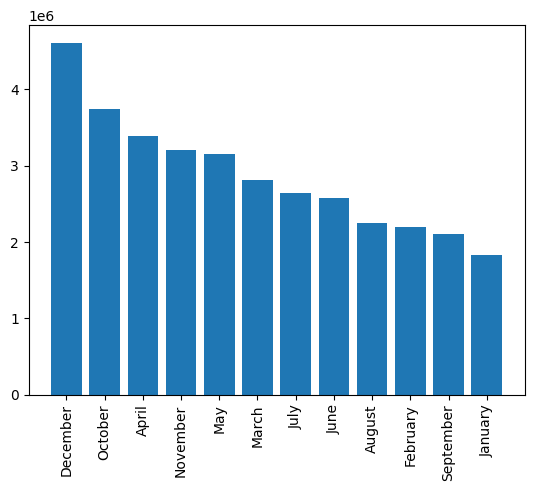

In [ ]:
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.show()

```
SELECT Month, SUM(Sales)
FROM sales_data
GROUP BY Month
```

### What city sold the most products?

In [ ]:
df.groupby("City")["Quantity Ordered"].sum().sort_values(ascending=False)

City
San Francisco    50239
Los Angeles      33289
New York City    27932
Boston           22528
Dallas           16730
Atlanta          16602
Seattle          16553
Portland         14053
Austin           11153
Name: Quantity Ordered, dtype: int64

### What time should we display advertisements to maximize the likelihood of customer’s buying a product?

In [ ]:
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
City                 object
Sales               float64
dtype: object

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
City                        object
Sales                      float64
dtype: object

In [ ]:
df['Order Date'].dt.time

0         19:34:00
1         10:05:00
2         20:18:00
3         10:21:00
4         18:58:00
            ...   
185945    19:09:00
185946    22:58:00
185947    14:31:00
185948    14:21:00
185949    16:43:00
Name: Order Date, Length: 185950, dtype: object

In [ ]:
df['Order Date'].dt.time.value_counts()

Order Date
11:58:00    252
19:20:00    246
19:15:00    243
20:13:00    242
12:21:00    240
           ... 
03:42:00      8
03:23:00      7
03:47:00      7
04:23:00      6
04:05:00      5
Name: count, Length: 1440, dtype: int64

In [ ]:
df["Time"] = df["Order Date"].dt.time
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Time
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",June,Portland,11.95,19:34:00
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",June,San Francisco,1700.00,10:05:00
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",June,Los Angeles,999.99,20:18:00
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",June,Seattle,149.99,10:21:00
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",June,San Francisco,99.99,18:58:00


In [ ]:
df.groupby("Time")["Sales"].sum()

Time
00:00:00    22488.86
00:01:00    12814.95
00:02:00    12951.64
00:03:00    18759.14
00:04:00    16960.08
              ...   
23:55:00    17294.89
23:56:00    19463.40
23:57:00    16237.62
23:58:00    19606.93
23:59:00    18079.08
Name: Sales, Length: 1440, dtype: float64

In [ ]:
df.groupby("Time")["Sales"].sum().sort_values(ascending=False)

Time
19:01:00    54503.14
12:21:00    54181.96
19:16:00    54156.39
20:13:00    53149.51
19:20:00    52903.41
              ...   
02:50:00      381.99
03:57:00      317.63
04:05:00      277.72
03:59:00      177.29
04:09:00      173.52
Name: Sales, Length: 1440, dtype: float64

In [ ]:
df.groupby("Time")["Sales"].sum().sort_values(ascending=False).keys()[0]

datetime.time(19, 1)

In [ ]:
df['Order Date'].dt.hour

0         19
1         10
2         20
3         10
4         18
          ..
185945    19
185946    22
185947    14
185948    14
185949    16
Name: Order Date, Length: 185950, dtype: int32

In [ ]:
df["Hour"] = df["Order Date"].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Time,Hour
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",June,Portland,11.95,19:34:00,19
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",June,San Francisco,1700.00,10:05:00,10
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",June,Los Angeles,999.99,20:18:00,20
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",June,Seattle,149.99,10:21:00,10
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",June,San Francisco,99.99,18:58:00,18


In [ ]:
df.groupby("Hour")["Sales"].sum().sort_values(ascending=False)

Hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: Sales, dtype: float64

### What products are most often sold together?

In [ ]:
df[df["Order ID"].duplicated(keep=False) == True]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Time,Hour
17,209938,iPhone,1,700.00,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",June,Seattle,700.00,12:29:00,12
18,209938,Wired Headphones,1,11.99,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",June,Seattle,11.99,12:29:00,12
29,209949,Google Phone,1,600.00,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",June,San Francisco,600.00,07:45:00,7
30,209949,USB-C Charging Cable,1,11.95,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",June,San Francisco,11.95,07:45:00,7
41,209960,USB-C Charging Cable,1,11.95,2019-06-22 11:53:00,"333 Sunset St, Dallas, TX 75001",June,Dallas,11.95,11:53:00,11
...,...,...,...,...,...,...,...,...,...,...,...
185769,150323,Apple Airpods Headphones,1,150.00,2019-01-15 23:31:00,"381 Wilson St, San Francisco, CA 94016",January,San Francisco,150.00,23:31:00,23
185781,150335,iPhone,1,700.00,2019-01-01 14:32:00,"956 Madison St, Los Angeles, CA 90001",January,Los Angeles,700.00,14:32:00,14
185782,150335,Apple Airpods Headphones,1,150.00,2019-01-01 14:32:00,"956 Madison St, Los Angeles, CA 90001",January,Los Angeles,150.00,14:32:00,14
185880,150433,Flatscreen TV,1,300.00,2019-01-18 22:27:00,"736 Chestnut St, San Francisco, CA 94016",January,San Francisco,300.00,22:27:00,22


In [ ]:
df[df["Order ID"] == "278806"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Time,Hour


In [ ]:
df_bundle = df[df["Order ID"].duplicated(keep=False)]

df_bundle

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Time,Hour
17,209938,iPhone,1,700.00,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",June,Seattle,700.00,12:29:00,12
18,209938,Wired Headphones,1,11.99,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",June,Seattle,11.99,12:29:00,12
29,209949,Google Phone,1,600.00,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",June,San Francisco,600.00,07:45:00,7
30,209949,USB-C Charging Cable,1,11.95,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",June,San Francisco,11.95,07:45:00,7
41,209960,USB-C Charging Cable,1,11.95,2019-06-22 11:53:00,"333 Sunset St, Dallas, TX 75001",June,Dallas,11.95,11:53:00,11
...,...,...,...,...,...,...,...,...,...,...,...
185769,150323,Apple Airpods Headphones,1,150.00,2019-01-15 23:31:00,"381 Wilson St, San Francisco, CA 94016",January,San Francisco,150.00,23:31:00,23
185781,150335,iPhone,1,700.00,2019-01-01 14:32:00,"956 Madison St, Los Angeles, CA 90001",January,Los Angeles,700.00,14:32:00,14
185782,150335,Apple Airpods Headphones,1,150.00,2019-01-01 14:32:00,"956 Madison St, Los Angeles, CA 90001",January,Los Angeles,150.00,14:32:00,14
185880,150433,Flatscreen TV,1,300.00,2019-01-18 22:27:00,"736 Chestnut St, San Francisco, CA 94016",January,San Francisco,300.00,22:27:00,22


In [ ]:
df_bundle.groupby("Order ID")["Product"].value_counts().to_frame().reset_index()

,Order ID,Product,count
0,141275,USB-C Charging Cable,1
1,141275,Wired Headphones,1
2,141290,AA Batteries (4-pack),1
3,141290,Apple Airpods Headphones,1
4,141365,Vareebadd Phone,1
...,...,...,...
14333,319584,iPhone,1
14334,319596,Lightning Charging Cable,1
14335,319596,iPhone,1
14336,319631,34in Ultrawide Monitor,1


In [ ]:
dir(df_bundle.groupby("Order ID")["Product"].value_counts())

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__rep

In [ ]:
df_bundle.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

17                                  iPhone,Wired Headphones
18                                  iPhone,Wired Headphones
29                        Google Phone,USB-C Charging Cable
30                        Google Phone,USB-C Charging Cable
41               USB-C Charging Cable,AA Batteries (4-pack)
                                ...                        
185769    Google Phone,USB-C Charging Cable,Apple Airpod...
185781                      iPhone,Apple Airpods Headphones
185782                      iPhone,Apple Airpods Headphones
185880                           Flatscreen TV,Google Phone
185881                           Flatscreen TV,Google Phone
Name: Product, Length: 14649, dtype: object

In [ ]:
df_bundle.groupby("Order ID")["Product"].transform(lambda x: ",".join(x)).values

array(['iPhone,Wired Headphones', 'iPhone,Wired Headphones',
       'Google Phone,USB-C Charging Cable', ...,
       'iPhone,Apple Airpods Headphones', 'Flatscreen TV,Google Phone',
       'Flatscreen TV,Google Phone'], dtype=object)

In [ ]:
df_bundle["Product_Bundle"] = df_bundle.groupby("Order ID")["Product"].transform(lambda x: ",".join(x)).values

df_bundle["Product_Bundle"]

17                                  iPhone,Wired Headphones
18                                  iPhone,Wired Headphones
29                        Google Phone,USB-C Charging Cable
30                        Google Phone,USB-C Charging Cable
41               USB-C Charging Cable,AA Batteries (4-pack)
                                ...                        
185769    Google Phone,USB-C Charging Cable,Apple Airpod...
185781                      iPhone,Apple Airpods Headphones
185782                      iPhone,Apple Airpods Headphones
185880                           Flatscreen TV,Google Phone
185881                           Flatscreen TV,Google Phone
Name: Product_Bundle, Length: 14649, dtype: object

In [ ]:
df_bundle

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Time,Hour,Product_Bundle
17,209938,iPhone,1,700.00,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",June,Seattle,700.00,12:29:00,12,"iPhone,Wired Headphones"
18,209938,Wired Headphones,1,11.99,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",June,Seattle,11.99,12:29:00,12,"iPhone,Wired Headphones"
29,209949,Google Phone,1,600.00,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",June,San Francisco,600.00,07:45:00,7,"Google Phone,USB-C Charging Cable"
30,209949,USB-C Charging Cable,1,11.95,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",June,San Francisco,11.95,07:45:00,7,"Google Phone,USB-C Charging Cable"
41,209960,USB-C Charging Cable,1,11.95,2019-06-22 11:53:00,"333 Sunset St, Dallas, TX 75001",June,Dallas,11.95,11:53:00,11,"USB-C Charging Cable,AA Batteries (4-pack)"
...,...,...,...,...,...,...,...,...,...,...,...,...
185769,150323,Apple Airpods Headphones,1,150.00,2019-01-15 23:31:00,"381 Wilson St, San Francisco, CA 94016",January,San Francisco,150.00,23:31:00,23,"Google Phone,USB-C Charging Cable,Apple Airpod..."
185781,150335,iPhone,1,700.00,2019-01-01 14:32:00,"956 Madison St, Los Angeles, CA 90001",January,Los Angeles,700.00,14:32:00,14,"iPhone,Apple Airpods Headphones"
185782,150335,Apple Airpods Headphones,1,150.00,2019-01-01 14:32:00,"956 Madison St, Los Angeles, CA 90001",January,Los Angeles,150.00,14:32:00,14,"iPhone,Apple Airpods Headphones"
185880,150433,Flatscreen TV,1,300.00,2019-01-18 22:27:00,"736 Chestnut St, San Francisco, CA 94016",January,San Francisco,300.00,22:27:00,22,"Flatscreen TV,Google Phone"


In [ ]:
df_bundle.shape

(14649, 12)

In [ ]:
df_bundle = df_bundle[["Order ID", "Product_Bundle"]].drop_duplicates()
df_bundle.head()

,Order ID,Product_Bundle
17,209938,"iPhone,Wired Headphones"
29,209949,"Google Phone,USB-C Charging Cable"
41,209960,"USB-C Charging Cable,AA Batteries (4-pack)"
43,209961,"iPhone,Lightning Charging Cable"
147,210064,"Lightning Charging Cable,27in FHD Monitor"


In [ ]:
df_bundle['Product_Bundle'][29]

'Google Phone,USB-C Charging Cable'

In [ ]:
counter = Counter()

for combo in df_bundle["Product_Bundle"]:
    combo_list = combo.split(",")
    # Counting all the 2-product bundles.
    counter.update(Counter(combinations(combo_list, 2)))

counter.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [ ]:
counter.most_common(1)

[(('iPhone', 'Lightning Charging Cable'), 1005)]

### What product sold the most? Why do you think it sold the most?

In [ ]:
df.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64